In [2]:
### Project Evaluation Phase 1
print("*************************************")
print(" \033[1m" + "Flip Robo Project Evaluation Phase 1" + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Project Evaluation Phase 1
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [3]:
print("---------------------------------\n")
print("\033[1m" + "Baseball Case Study\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

Baseball Case Study

---------------------------------



# Loading Libraries


In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, mean_squared_error, recall_score, precision_score, roc_auc_score, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay, mean_absolute_error, r2_score, explained_variance_score, max_error
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_predict
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, f_regression, RFE
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
from tensorflow.keras.models import Sequential

# Loading the Dataset

In [8]:
data = pd.read_csv('baseball.csv')

# About the Data

In [9]:
# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

**Machine Learning Approach:**

To accomplish this predictive task, we will employ supervised machine learning techniques. Specifically, we will use regression analysis since our objective is to predict a continuous numerical outcome (the number of wins). 
Regression models will enable us to establish a connection between the input features and the target variable (wins) using historical data. 
This learned relationship can then be applied to the 2015 season data for predictive purposes.


# Data Preprocessing + Exploratory Data Analysis

### Handling Missing Value 

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


There are no missing value

In [11]:
# Generate statistical summaries of the dataset
data.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

## Exploratory Data Analysis 

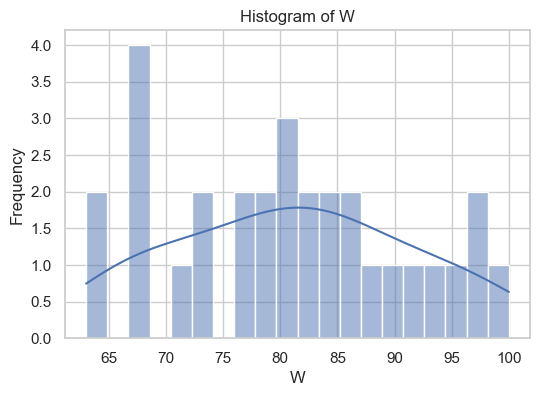

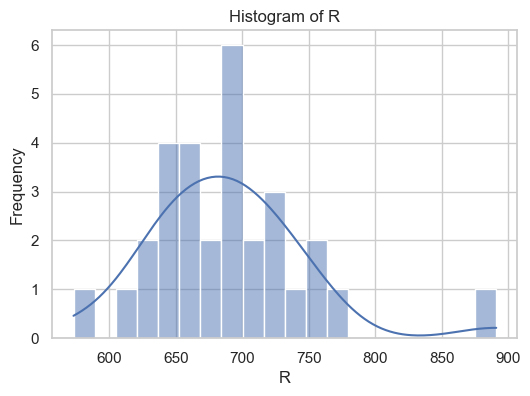

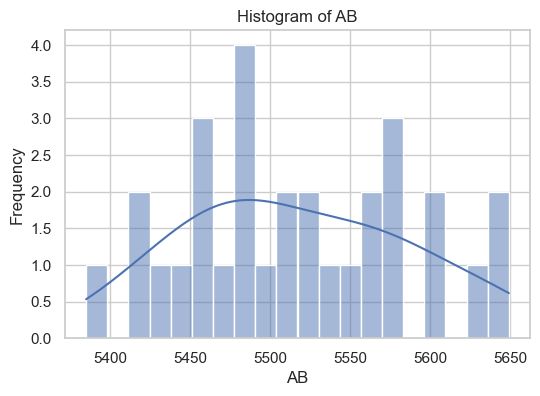

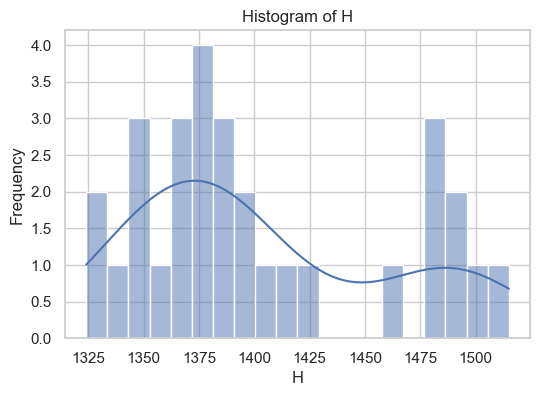

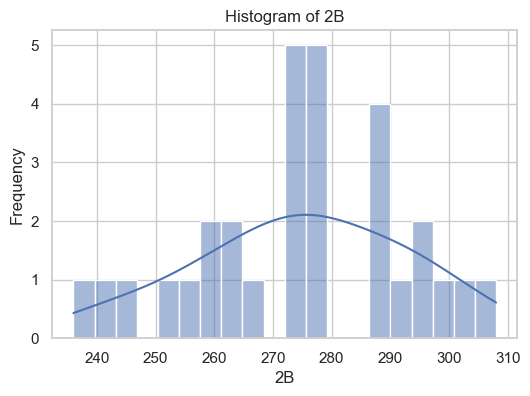

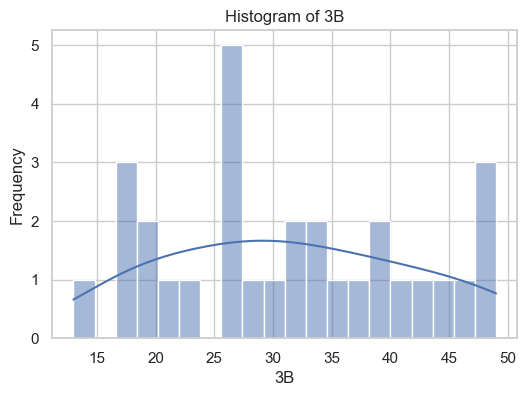

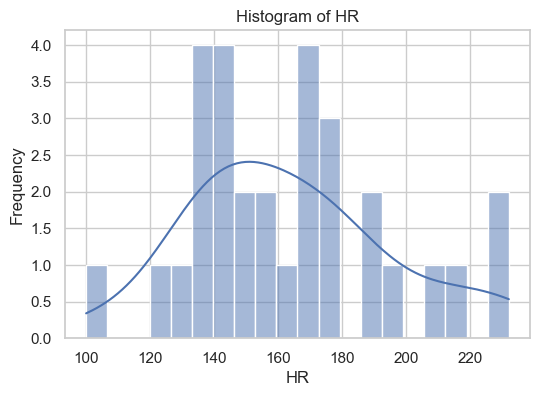

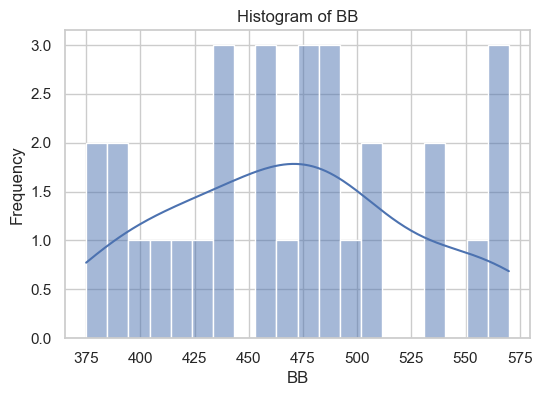

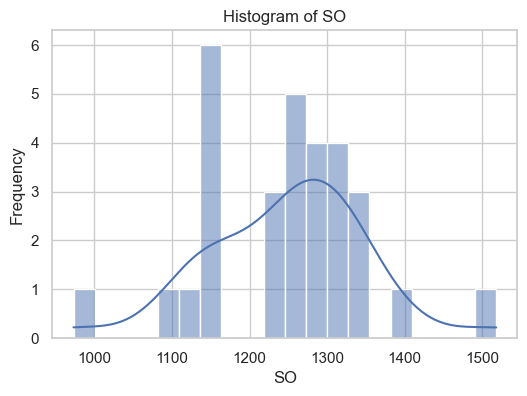

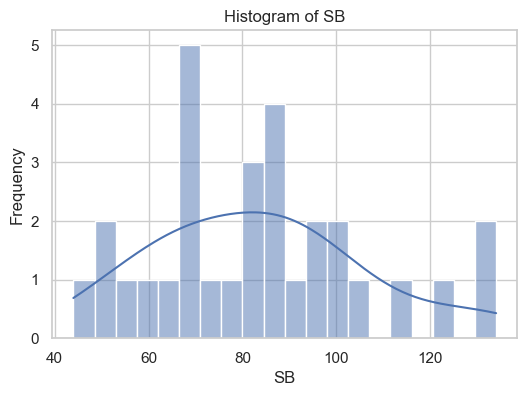

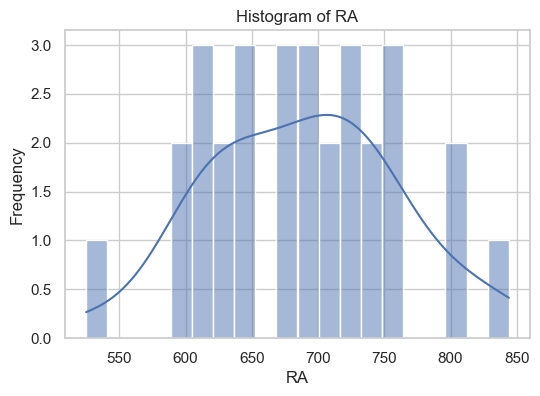

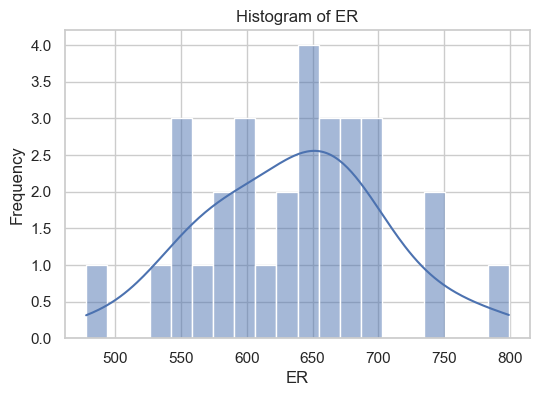

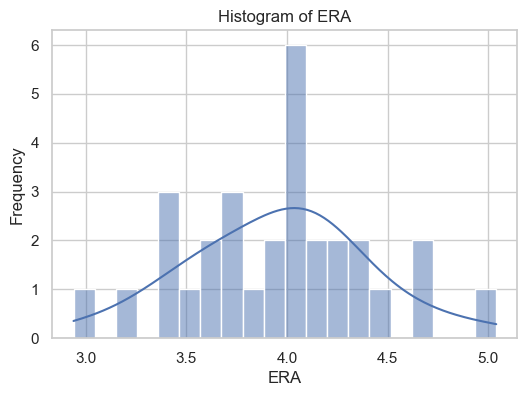

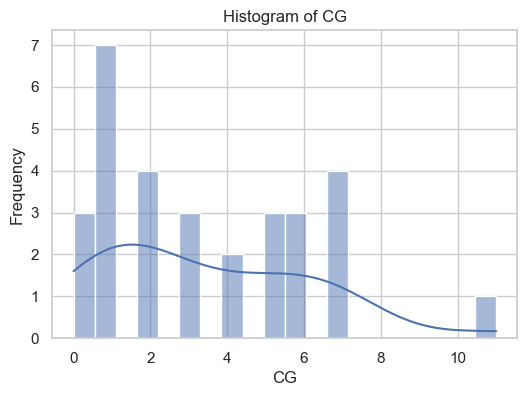

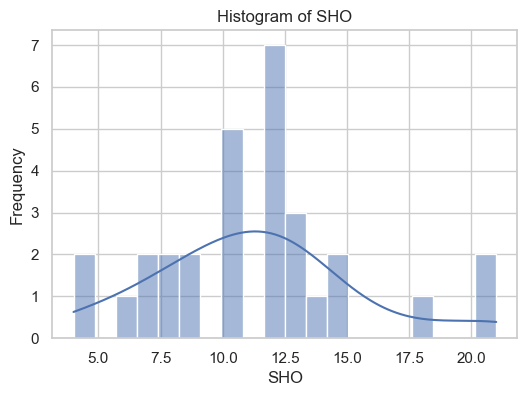

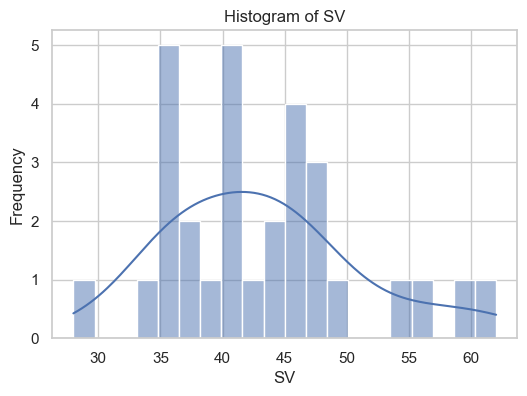

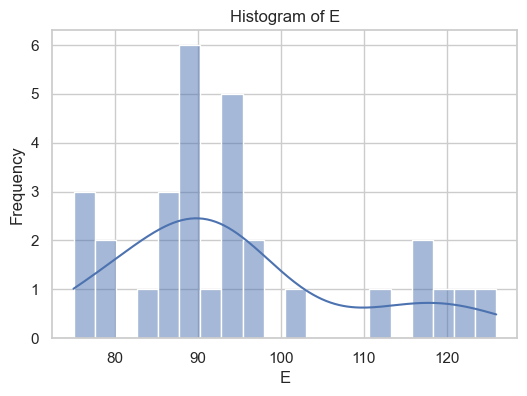

In [12]:
# Get the list of column names to visualize
columns_to_visualize = data.columns

# Set the style for the plots
sns.set(style="whitegrid")

# Iterate through each column and display a histogram
for column in columns_to_visualize:
    plt.figure(figsize=(6, 4))  # Adjust the figsize as needed to control the plot size
    sns.histplot(data=data[column], kde=True, bins=20)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Checking and Hanlding Outliers 

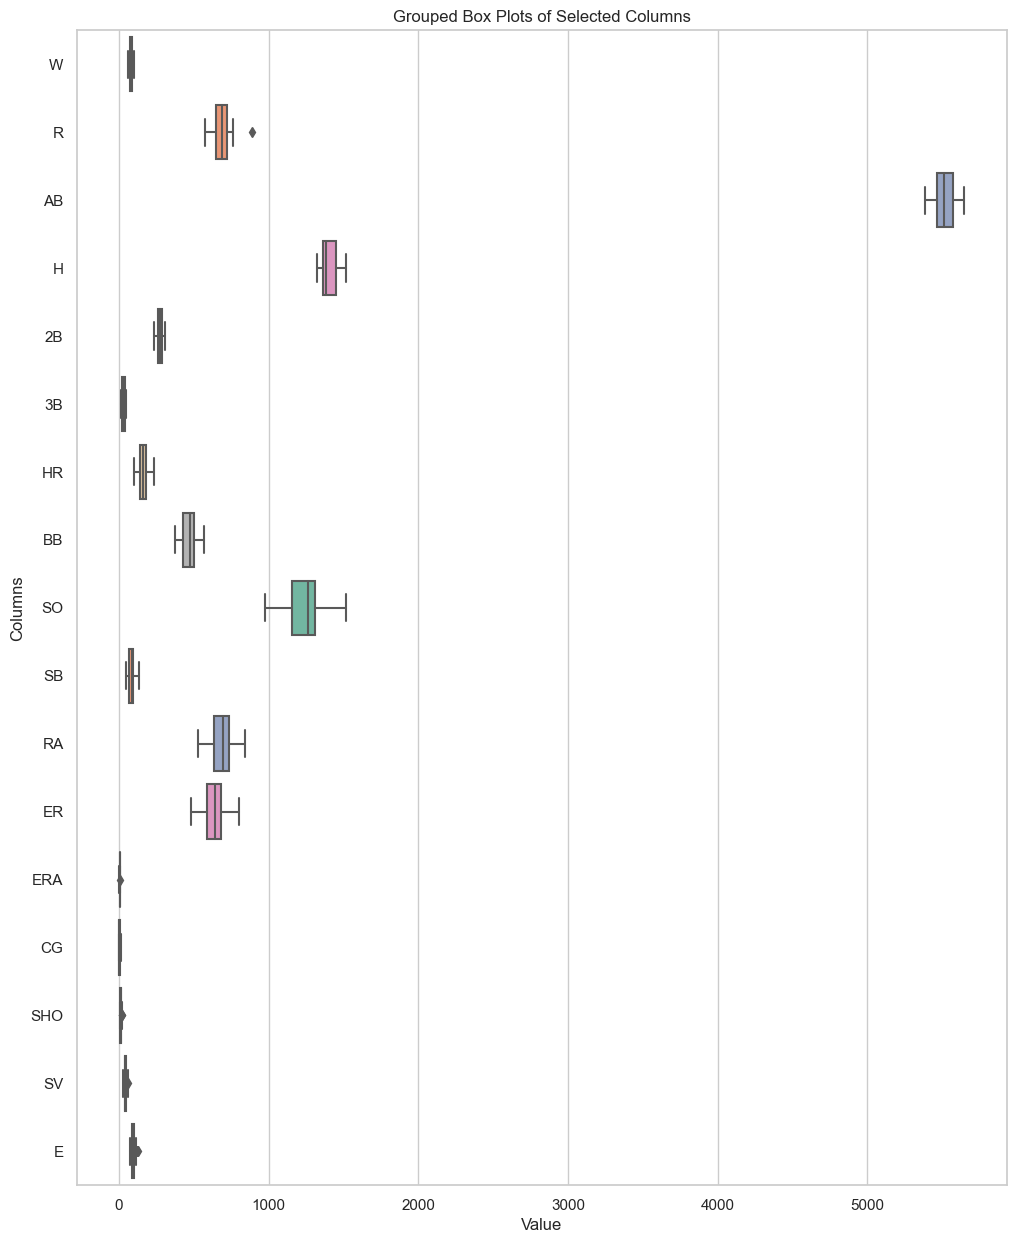

In [13]:
columns_to_visualize = data.columns

# Set the style
sns.set(style="whitegrid")

# Create a grouped box plot for selected columns
plt.figure(figsize=(12, 15))  # Adjust the figsize as needed
sns.boxplot(data=data[columns_to_visualize], orient="h", palette="Set2")
plt.title('Grouped Box Plots of Selected Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()

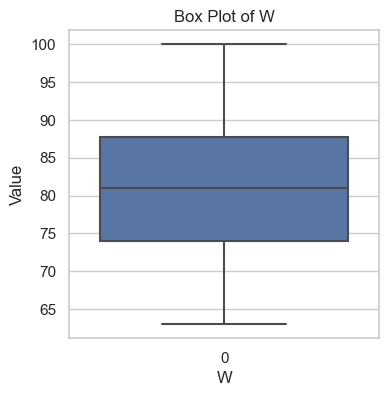

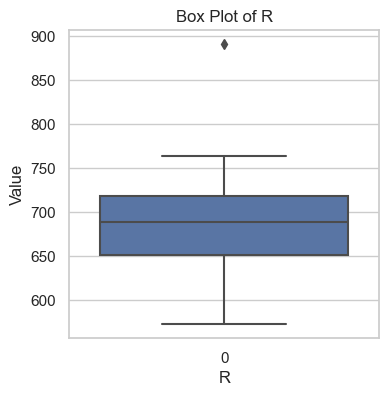

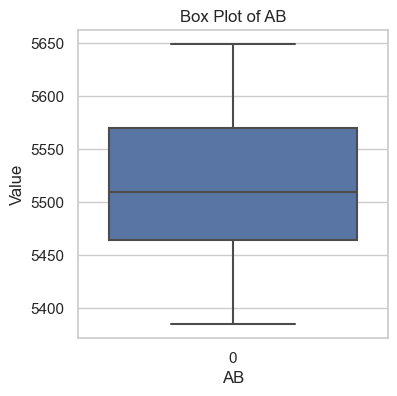

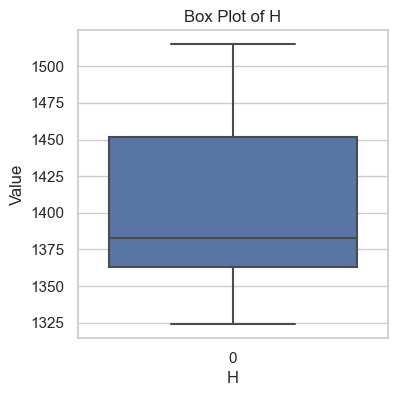

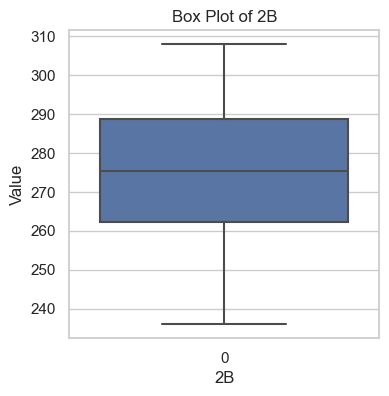

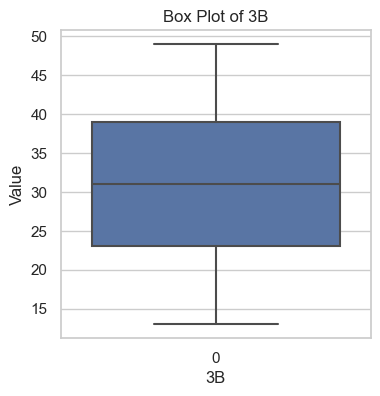

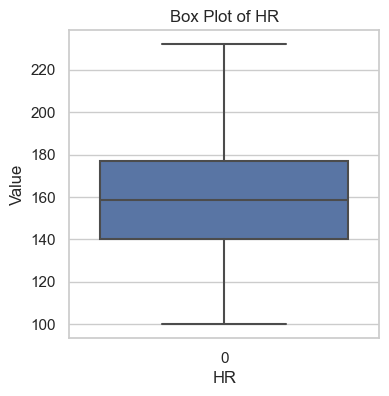

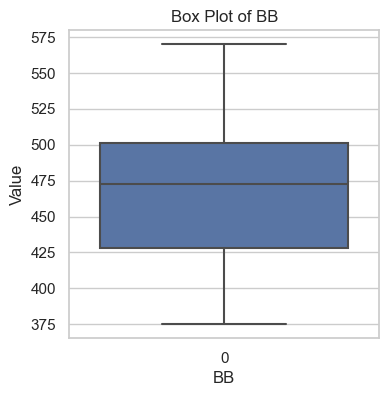

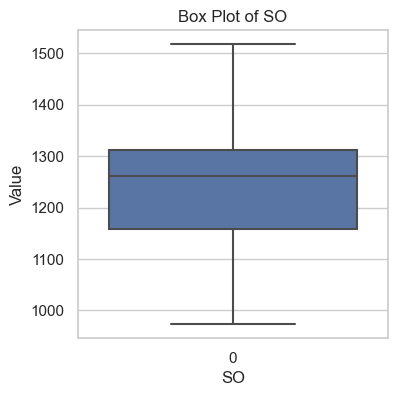

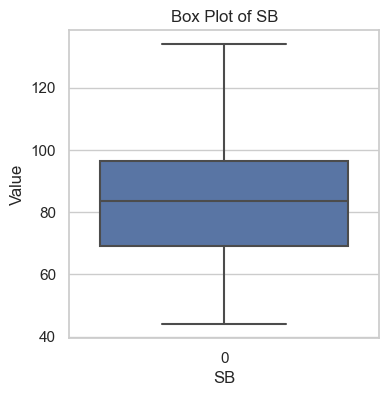

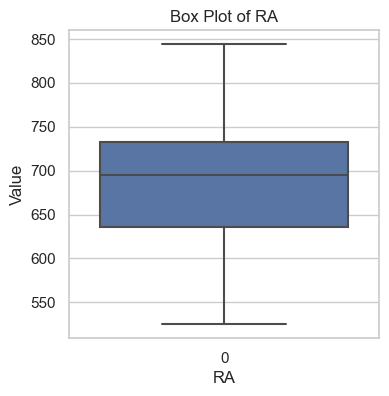

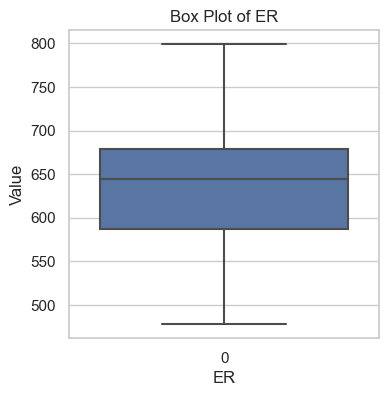

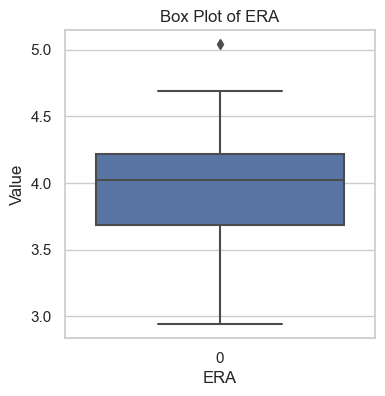

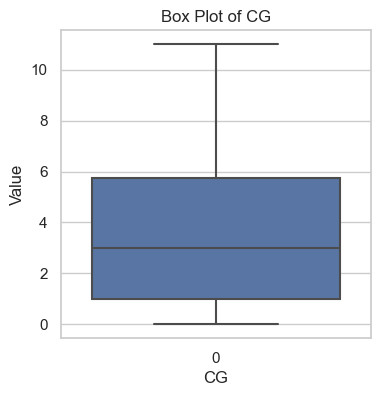

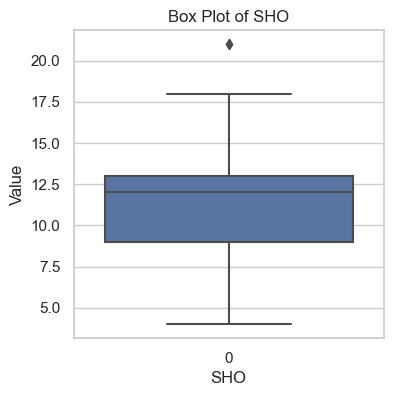

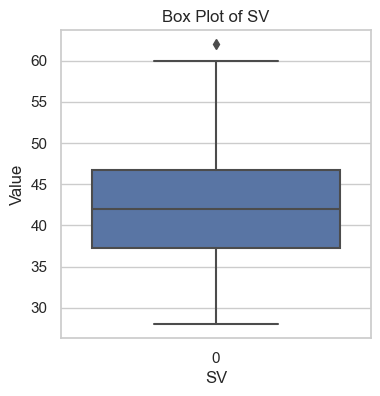

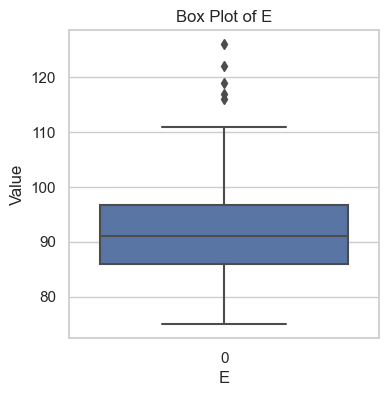

In [14]:
columns_to_visualize = data.columns

sns.set(style="whitegrid")
# Iterate through each column and display the box plot
for column in columns_to_visualize:
    plt.figure(figsize=(4, 4))  # Adjust the figsize as needed
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

In [15]:
# Define a function to identify outlier columns using the IQR method
def identify_outlier_columns(data, threshold=1.5):
    """
    Identify outlier columns in a DataFrame using the IQR method.

    Parameters:
    - data: DataFrame containing the dataset.
    - threshold: Multiplier for defining outliers (default is 1.5).

    Returns:
    - List of column names identified as outlier columns.
    """
    outlier_columns = []

    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate the IQR (Interquartile Range) for each column
    IQR = Q3 - Q1

    # Determine outlier columns based on the threshold
    for column in data.columns:
        is_outlier = ((data[column] < (Q1[column] - threshold * IQR[column])) |
                      (data[column] > (Q3[column] + threshold * IQR[column])))
        if is_outlier.any():
            outlier_columns.append(column)

    return outlier_columns

# Example: Identify outlier columns in your dataset
outliers = identify_outlier_columns(data)

# Print the list of outlier columns
print("Outlier Columns:", outliers)


Outlier Columns: ['R', 'ERA', 'SHO', 'SV', 'E']


In [19]:
# Define a function to count the number of outliers in identified outlier columns
def count_outliers_in_columns(data, columns, threshold=1.5):
    """
    Count the number of outliers in specified columns of a DataFrame using the IQR method.

    Parameters:
    - data: DataFrame containing the dataset.
    - columns: List of column names to check for outliers.
    - threshold: Multiplier for defining outliers (default is 1.5).

    Returns:
    - A dictionary where keys are column names and values are the number of outliers in each column.
    """
    outlier_counts = {}

    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)

    # Calculate the IQR (Interquartile Range) for each column
    IQR = Q3 - Q1

    # Count outliers in each column based on the threshold
    for column in columns:
        is_outlier = ((data[column] < (Q1[column] - threshold * IQR[column])) |
                      (data[column] > (Q3[column] + threshold * IQR[column])))
        outlier_counts[column] = is_outlier.sum()

    return outlier_counts

# Identify outlier columns
outlier_columns = ['R', 'ERA', 'SHO', 'SV', 'E']

# Count the number of outliers in each identified outlier column
outlier_counts = count_outliers_in_columns(data, outlier_columns)

# Print the number of outliers in each column
for column, count in outlier_counts.items():
    print(f"Column: {column}, Number of Outliers: {count}")


Column: R, Number of Outliers: 1
Column: ERA, Number of Outliers: 1
Column: SHO, Number of Outliers: 2
Column: SV, Number of Outliers: 1
Column: E, Number of Outliers: 5


In [20]:
# Make a copy of the original data
data_copy = data.copy()

# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(data_copy, column, lower_bound=None, upper_bound=None):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data_copy[column].quantile(0.25)
    Q3 = data_copy[column].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    if lower_bound is None:
        lower_bound = Q1 - 1.5 * IQR  # Adjust the multiplier as needed
    if upper_bound is None:
        upper_bound = Q3 + 1.5 * IQR  # Adjust the multiplier as needed
    
    # Cap values outside the bounds
    data_copy[column] = data_copy[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# List of columns with outliers (e.g., 'R', 'ERA', 'SHO', 'SV', 'E')
outlier_columns = ['R', 'ERA', 'SHO', 'SV', 'E']

# Handle outliers for each column in the copied dataset
for column in outlier_columns:
    handle_outliers_iqr(data_copy, column)

In [21]:
# Identify outlier columns in your copied dataset
outliers = identify_outlier_columns(data_copy)

# Print the list of outlier columns
print("Outlier Columns:", outliers)


Outlier Columns: []


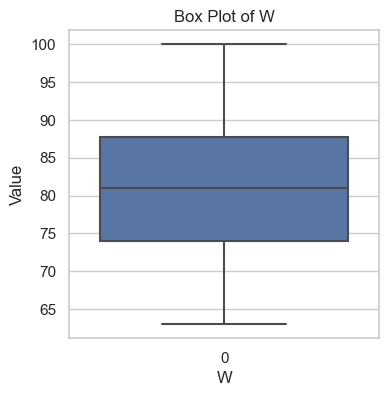

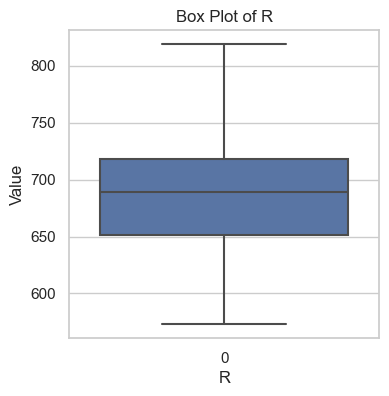

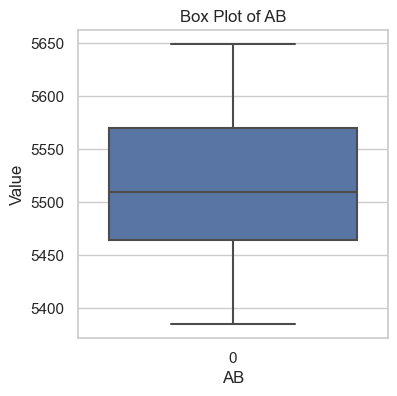

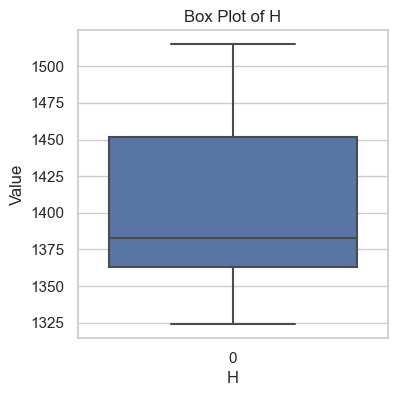

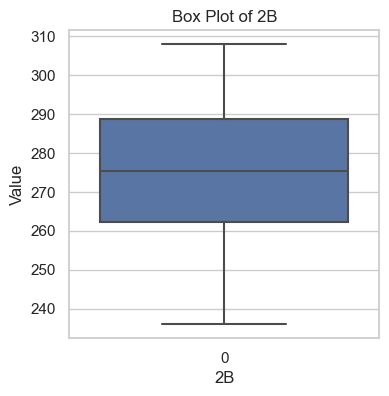

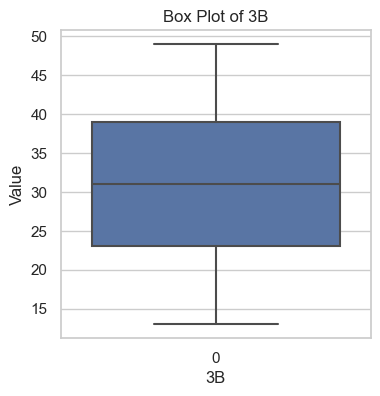

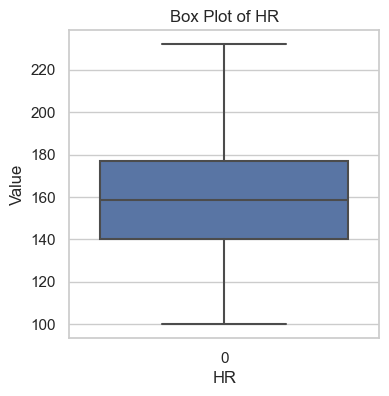

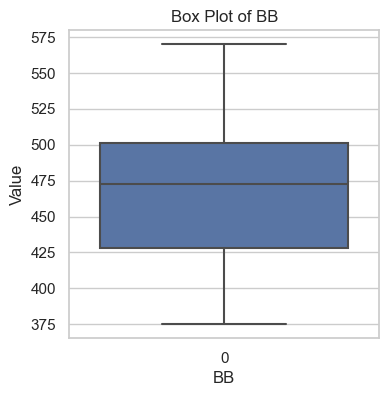

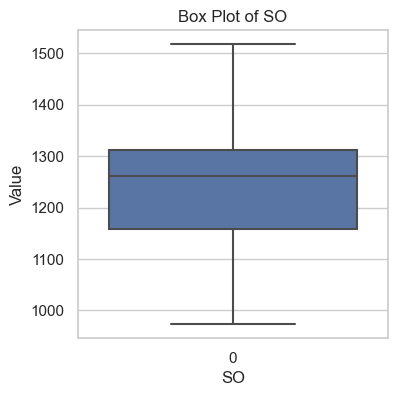

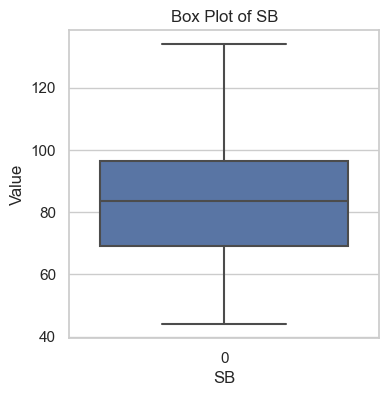

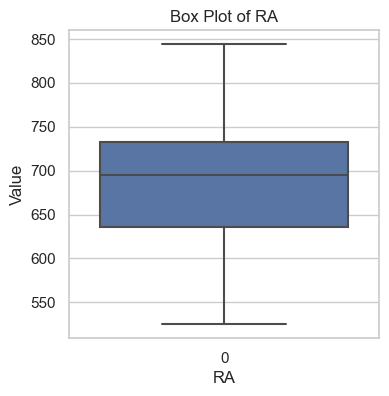

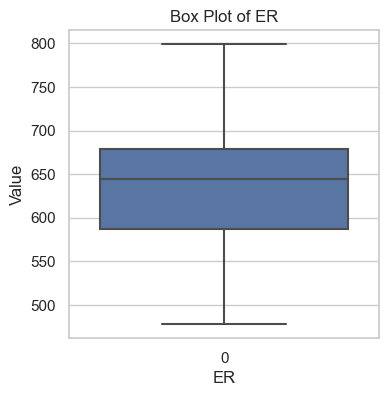

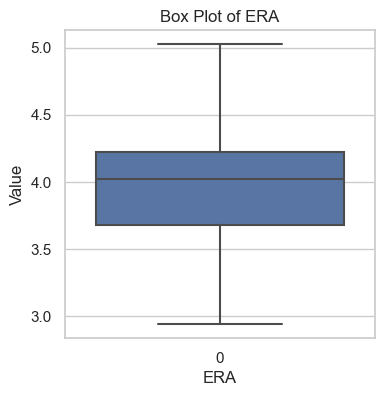

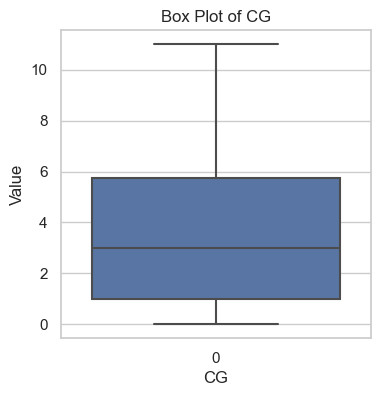

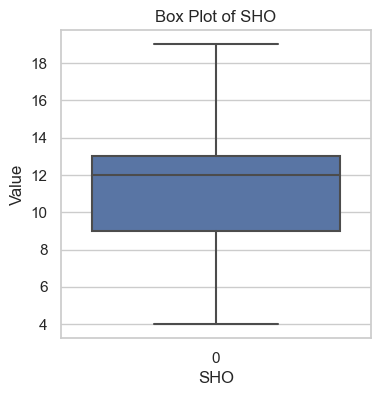

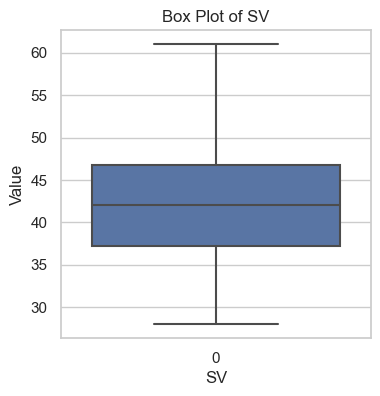

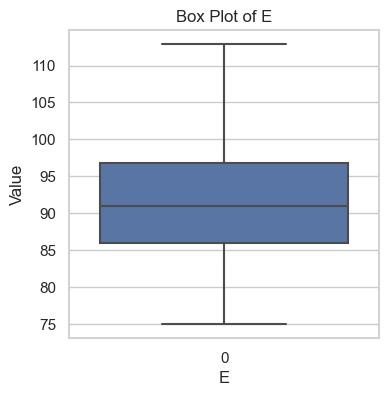

In [22]:
columns_to_visualize = data_copy.columns

sns.set(style="whitegrid")
# Iterate through each column and display the box plot
for column in columns_to_visualize:
    plt.figure(figsize=(4, 4))  # Adjust the figsize as needed
    sns.boxplot(data=data_copy[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.show()

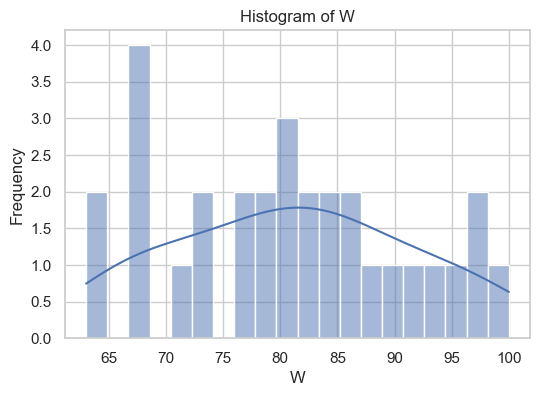

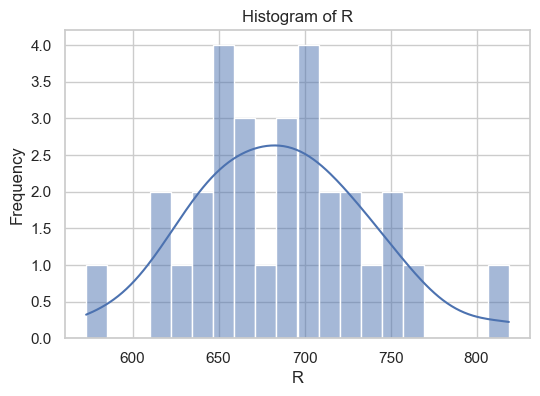

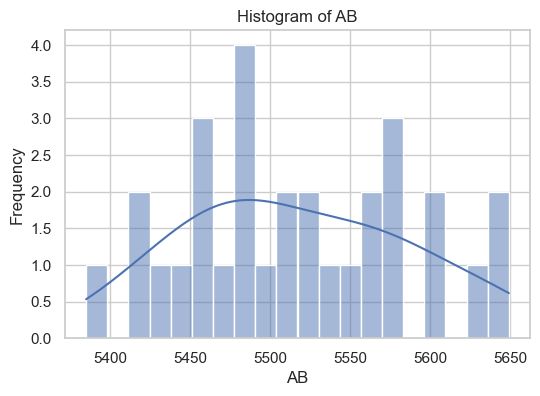

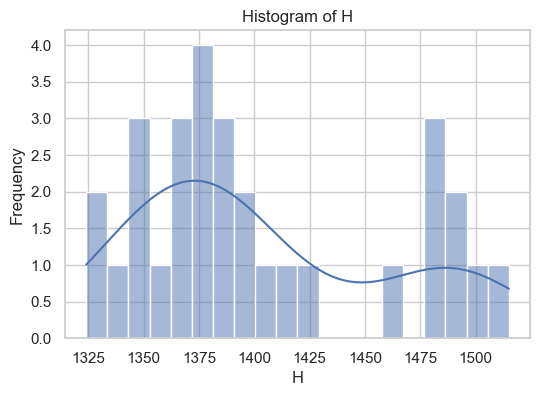

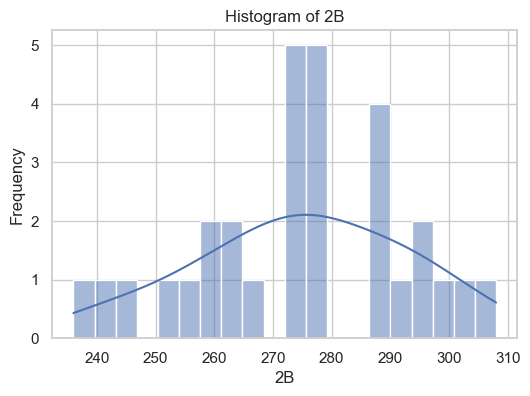

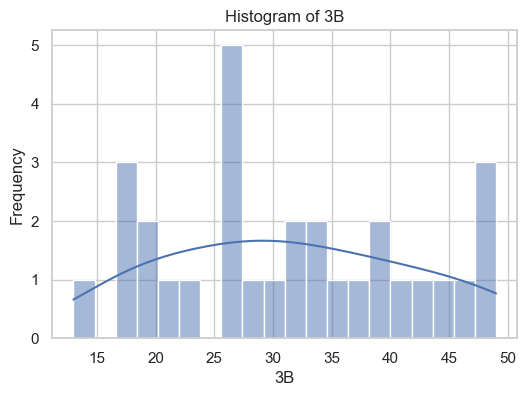

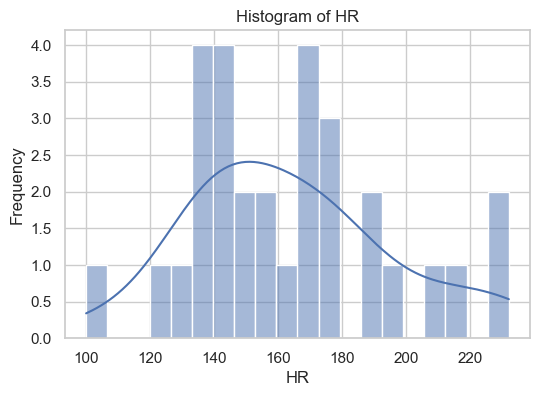

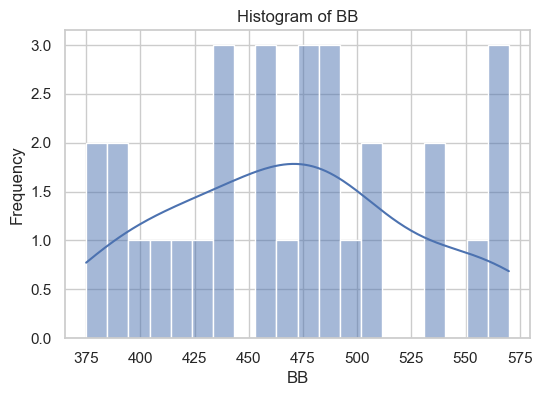

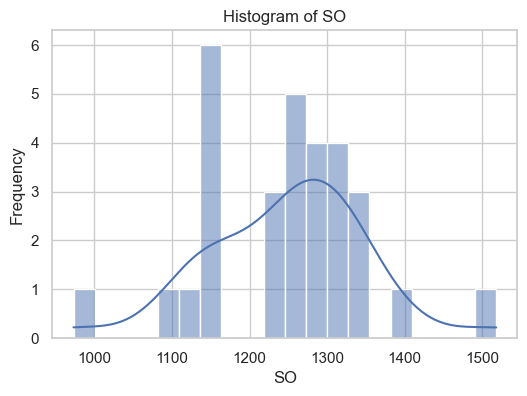

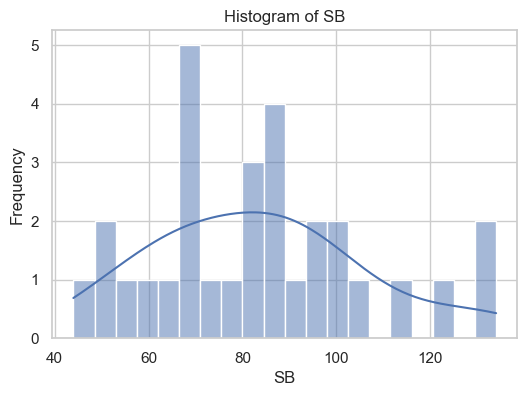

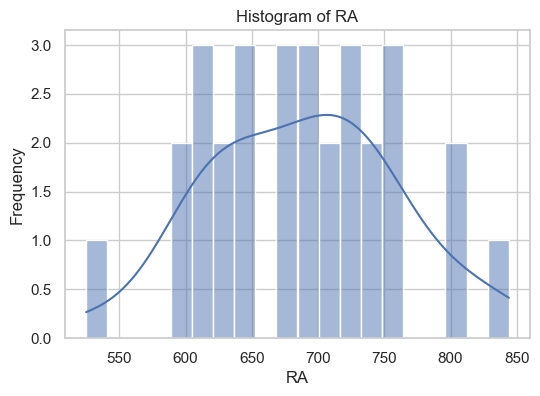

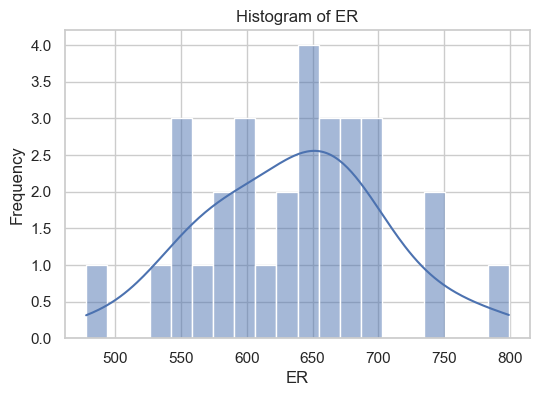

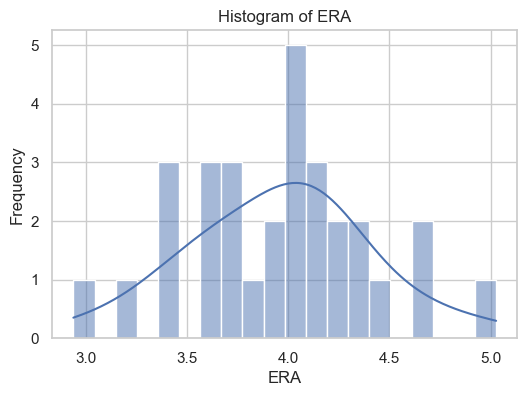

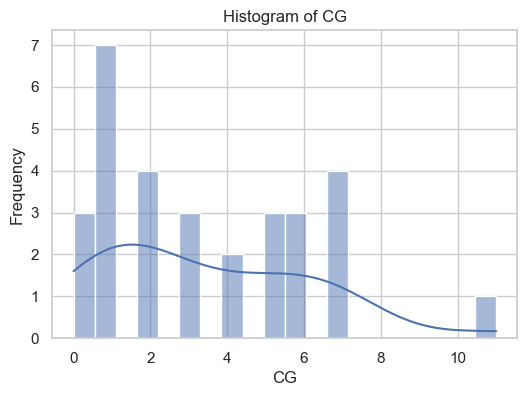

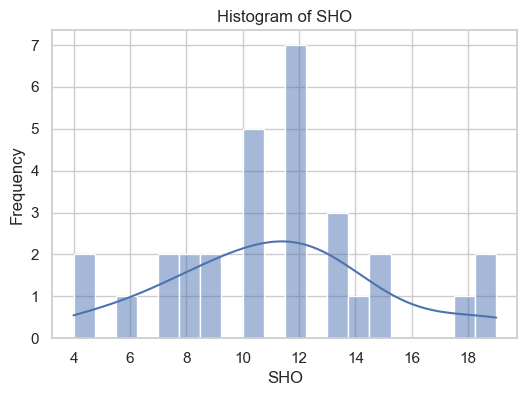

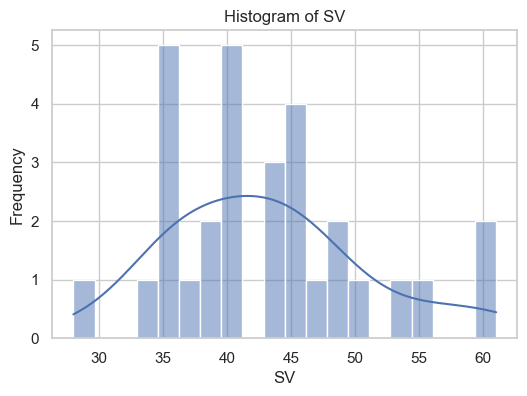

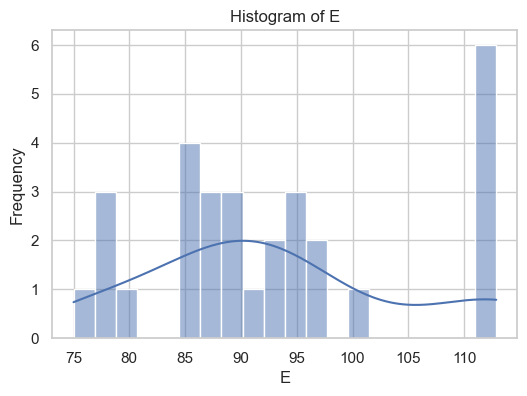

In [23]:
# Get the list of column names to visualize
columns_to_visualize = data_copy.columns

# Set the style for the plots
sns.set(style="whitegrid")

# Iterate through each column and display a histogram
for column in columns_to_visualize:
    plt.figure(figsize=(6, 4))  # Adjust the figsize as needed to control the plot size
    sns.histplot(data=data_copy[column], kde=True, bins=20)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [24]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     float64
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     float64
 15  SV      30 non-null     float64
 16  E       30 non-null     float64
dtypes: float64(5), int64(12)
memory usage: 4.1 KB


In [25]:
import plotly.express as px

# Create an interactive scatterplot matrix for all columns using Plotly Express
fig = px.scatter_matrix(data_copy)
fig.show()

In [26]:
# Create an interactive scatterplot matrix using Plotly Express
fig = px.scatter_matrix(data_copy, dimensions=['W', 'R', 'ERA', 'SHO', 'SV', 'E'])
fig.show()

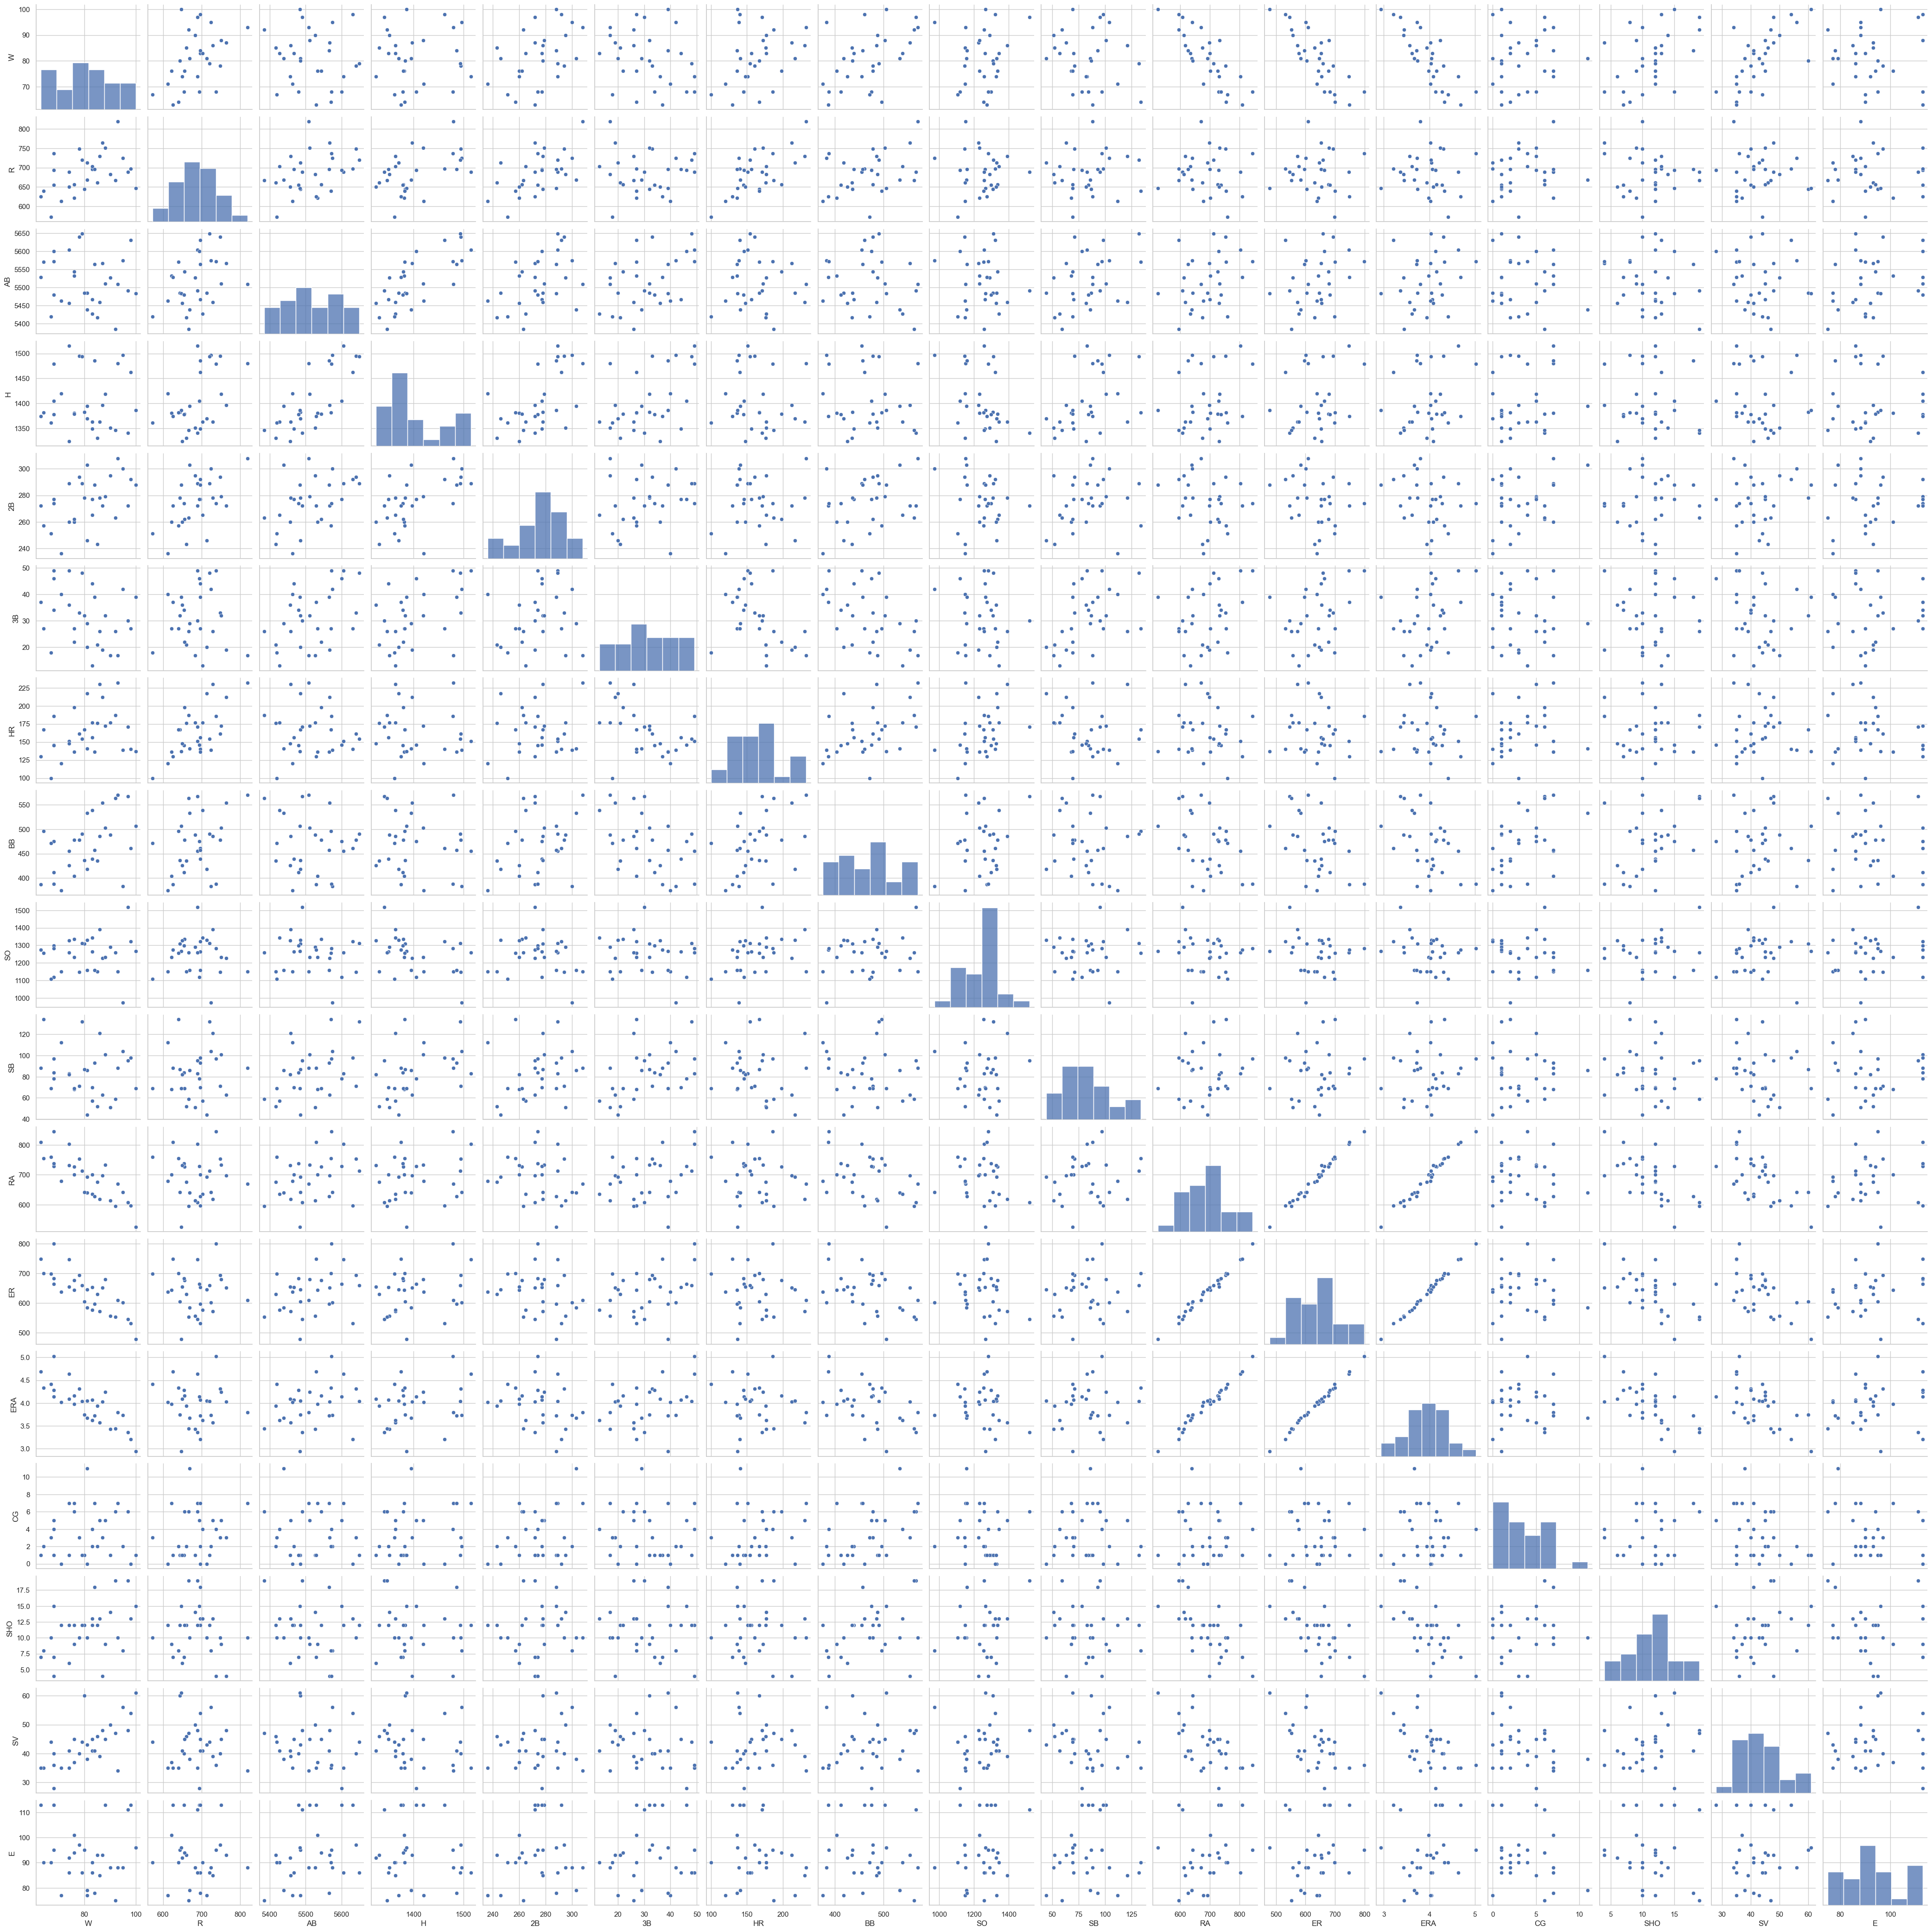

In [27]:
# Create a pairplot of the data_copy DataFrame
sns.pairplot(data_copy)
plt.show()

### Correlation Matrix 

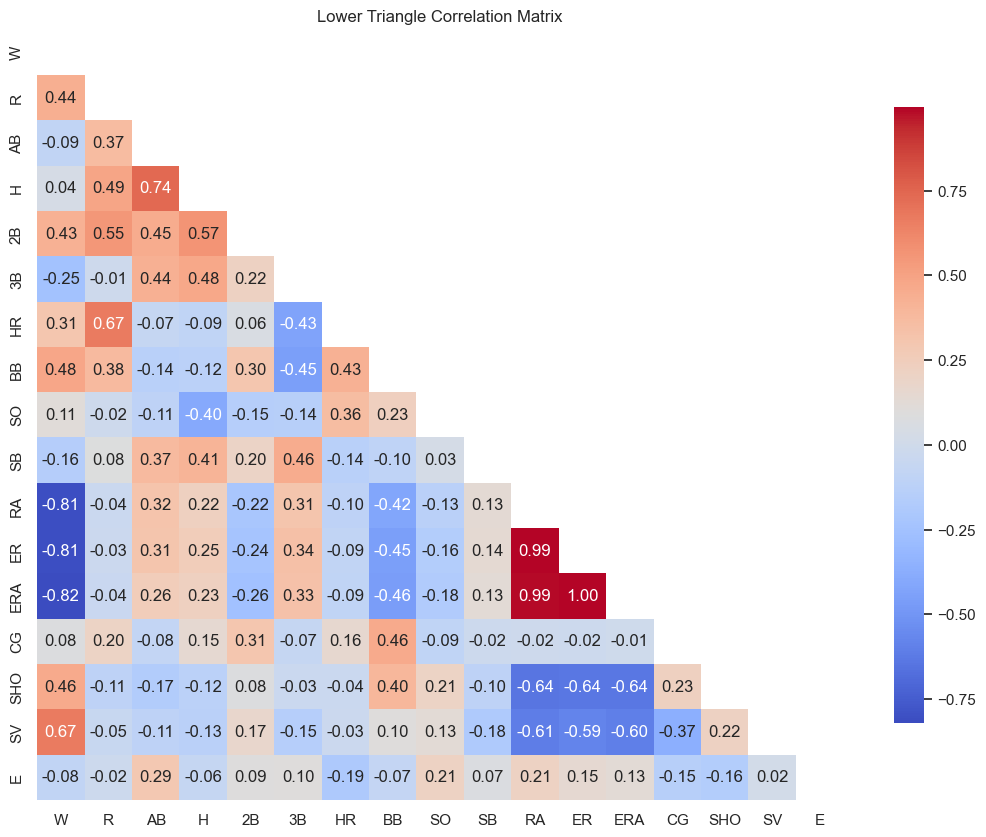

In [28]:
# Calculate the correlation matrix
correlation_matrix = data_copy.corr()

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(13, 10))  # Adjust the figure size as needed

# Create a lower triangle correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, cbar_kws={"shrink": 0.8})

plt.title('Lower Triangle Correlation Matrix')
plt.grid(False)  # Remove the grid
plt.show()


Here's a summary of the correlation matrix:

* Wins ("W") has a strong positive correlation with Runs ("R"), Walks ("BB"), and Saves ("SV"). It has a strong negative correlation with Runs Allowed ("RA"), Earned Runs ("ER"), and Earned Run Average ("ERA"). This suggests that teams that score more runs, have more walks, and save more games tend to win more, while teams that allow more runs and have higher earned run statistics tend to win less.

* Runs Allowed ("RA") and Earned Runs ("ER") have a very strong positive correlation, which is expected because earned runs contribute to the total runs allowed.

* Earned Run Average ("ERA") has a strong positive correlation with Runs Allowed ("RA") and Earned Runs ("ER"), indicating that a higher ERA is associated with allowing more runs and earned runs.

* Saves ("SV") has a strong positive correlation with Wins ("W"), implying that teams with more saves tend to win more games.

* Complete Games ("CG") has a weak positive correlation with Wins ("W"), suggesting that having more complete games may have a minor positive effect on the number of wins.

* Triples ("3B") has a negative correlation with Runs Allowed ("RA") and Earned Run Average ("ERA"), meaning that teams that allow fewer runs and have a lower ERA tend to have more triples.

* Strikeouts ("SO") has a weak negative correlation with Runs Allowed ("RA") and Earned Run Average ("ERA"), indicating that teams with more strikeouts tend to allow fewer runs and have a lower ERA.

* Errors ("E") has a weak negative correlation with Wins ("W"), suggesting that teams with fewer errors may win slightly more games.

This summary provides an overview of the key correlations in the dataset, helping to understand how different variables relate to each other and how they might impact a team's performance in baseball.

# Data Splitting

In [29]:
# Define the features (X) and target (y)
X = data_copy.drop(columns=['W'])  # Features are all columns except 'W'
y = data_copy['W']  # Target is the 'W' column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are the training features and target,
# and X_test and y_test are the testing features and target.

# Feature Selection

RA: 0.22133205659849886
SV: 0.1647773523340993
R: 0.13311579103640822
ER: 0.12895802066736775
ERA: 0.11360091424925411
2B: 0.05140708128935489
SB: 0.03024172034149573
BB: 0.028484468111833992
3B: 0.022291148474445088
AB: 0.02192064161426491
E: 0.020665382365049598
H: 0.018108287588718134
SHO: 0.015829884131851282
CG: 0.014996882551859079
SO: 0.010496016887444903
HR: 0.0037743517580540674


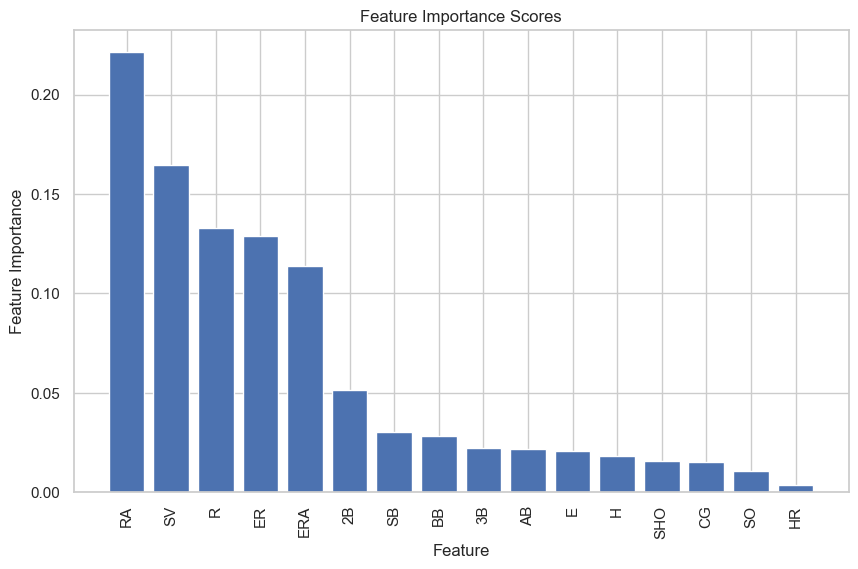

In [30]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Get the names of the features (columns)
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Print feature importance scores and names
for i in range(len(sorted_idx)):
    print(f"{feature_names[sorted_idx[i]]}: {feature_importances[sorted_idx[i]]}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()

## Feature Scaling 

In [31]:
# Create a StandardScaler instance
standard_scaler = StandardScaler()

# Create a MinMaxScaler instance
minmax_scaler = MinMaxScaler()

# Define the features (X) and target (y)
X = data_copy.drop(columns=['W'])  # Features are all columns except 'W'
y = data_copy['W']  # Target is the 'W' column

# Standardize the features using StandardScaler
X_standardized = standard_scaler.fit_transform(X)

# Min-Max scale the features using MinMaxScaler
X_minmax_scaled = minmax_scaler.fit_transform(X)

# Convert the scaled arrays back to DataFrames for easier analysis (optional)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)



In [32]:
# Display the first few rows of the scaled DataFrames
print("Standardized Features:")
X_standardized_df.head()

Standardized Features:


R        AB         H        2B        3B        HR        BB  \
0  0.759052  0.847731  1.663685  1.420173  1.041193 -0.787299 -1.534902   
1  0.202314 -0.711094 -0.970681  0.127403  1.235809 -0.243967 -0.536592   
2 -0.334539 -1.115233 -0.151891  1.588795 -0.223808 -0.723377  1.139144   
3 -1.269063  0.241522 -0.401088 -0.828122 -0.418423 -0.883181 -1.160536   
4  0.063130  1.280738  1.984081  0.801892  1.722347 -0.403770 -0.251360   

         SO        SB        RA        ER       ERA        CG       SHO  \
0 -2.697630  0.913883 -0.666234 -0.505110 -0.507186 -0.539806 -0.844153   
1  0.154878 -0.601826  0.165971  0.248930  0.256260 -0.539806  0.222145   
2 -0.893982  0.111449 -0.680339 -0.751623 -0.641912  2.772641 -0.311004   
3 -0.168602 -0.690985  0.180076  0.103922  0.054171  1.300442 -0.577578   
4  0.105866 -0.022290  1.618803  1.597501  1.536154  1.300442  0.222145   

         SV         E  
0  1.693402 -0.447467  
1  0.256840 -0.621382  
2 -0.657336 -1.230082  
3 -0.787933  0.682976  
4 -1.049126 -0.621382

In [33]:
print("\nMin-Max Scaled Features:")
X_minmax_scaled_df.head()


Min-Max Scaled Features:


R        AB         H        2B        3B        HR        BB  \
0  0.614446  0.719697  0.905759  0.888889  0.805556  0.295455  0.041026   
1  0.500509  0.310606  0.130890  0.569444  0.861111  0.424242  0.328205   
2  0.390641  0.204545  0.371728  0.930556  0.444444  0.310606  0.810256   
3  0.199390  0.560606  0.298429  0.333333  0.388889  0.272727  0.148718   
4  0.472024  0.833333  1.000000  0.736111  1.000000  0.386364  0.410256   

         SO        SB        RA        ER       ERA        CG       SHO  \
0  0.000000  0.666667  0.363636  0.383178  0.378670  0.181818  0.266667   
1  0.533945  0.288889  0.548589  0.545171  0.541642  0.181818  0.533333   
2  0.337615  0.466667  0.360502  0.330218  0.349910  1.000000  0.400000   
3  0.473394  0.266667  0.551724  0.514019  0.498502  0.636364  0.333333   
4  0.524771  0.433333  0.871473  0.834891  0.814859  0.636364  0.533333   

         SV         E  
0  0.848485  0.343234  
1  0.515152  0.290429  
2  0.303030  0.105611  
3  0.272727  0.686469  
4  0.212121  0.290429

### Data Split After Sclaing  

In [34]:
# Define the features (X) and target (y)
X = X_standardized_df  # Use the standardized features
y = data_copy['W']  # Target is the 'W' column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are the training features and target,
# and X_test and y_test are the testing features and target.

# Model Building and Training

In [35]:
# Create and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Create and train the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Create and train the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

# Create and train the K-Nearest Neighbors (KNN) Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Create and train the Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

# Model Evaluation and comparison

In [36]:
# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    return adjusted_r2

# Create a DataFrame to store the results
model_results = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2", "Adjusted R2"])

# Define the list of models and their names
models = [linear_reg_model, decision_tree_model, random_forest_model, svr_model, knn_model, gradient_boosting_model]
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "SVR", "KNN", "Gradient Boosting"]

# Initialize lists to store metric values
mae_values = []
mse_values = []
rmse_values = []
r2_values = []
adjusted_r2_values = []

# Iterate through each model and evaluate it
for model, model_name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Square root of MSE
    r2 = r2_score(y_test, y_pred)
    
    # Adjusted R-squared requires the number of features (p) and the number of samples (n)
    p = X_test.shape[1]
    n = len(X_test)
    adjusted_r2 = adjusted_r2_score(y_test, y_pred, n, p)
    
    # Append metric values to respective lists
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(r2)
    adjusted_r2_values.append(adjusted_r2)

# Populate the results DataFrame
model_results["Model"] = model_names
model_results["MAE"] = mae_values
model_results["MSE"] = mse_values
model_results["RMSE"] = rmse_values
model_results["R2"] = r2_values
model_results["Adjusted R2"] = adjusted_r2_values

# Display the results DataFrame
model_results


Model       MAE        MSE      RMSE        R2  Adjusted R2
0  Linear Regression  4.768260  29.772727  5.456439  0.773735     1.102848
1      Decision Tree  6.666667  75.333333  8.679478  0.427486     1.260234
2      Random Forest  5.720000  51.472700  7.174448  0.608821     1.177809
3                SVR  4.069166  28.731118  5.360142  0.781651     1.099250
4                KNN  5.966667  55.140000  7.425631  0.580950     1.190477
5  Gradient Boosting  6.000334  48.018394  6.929531  0.635072     1.165876

Let's interpret and summarize the model evaluation results:

**1. Linear Regression:** The Linear Regression model has relatively low MAE and RMSE, indicating that it makes relatively small prediction errors. The R-squared and Adjusted R-squared values suggest that around 77.4% of the variance in the target variable is explained by the model.

**2. Decision Tree:** The Decision Tree model shows higher MAE and RMSE compared to Linear Regression, indicating larger prediction errors. The R-squared and Adjusted R-squared values suggest that the model explains around 42.7% of the variance.

**3. Random Forest:** The Random Forest model performs better than the Decision Tree, with lower MAE and RMSE. It also explains more variance in the target variable, with an R-squared of approximately 60.9%.

**4. SVR (Support Vector Regression):** SVR performs well, with the lowest MAE and RMSE among the models. It also has a high R-squared value, indicating that it explains approximately 78.2% of the variance.

**5. K-Nearest Neighbors (KNN):** The KNN model shows moderate performance, with MAE and RMSE falling between the best and worst models. It explains around 58.1% of the variance.

**6. Gradient Boosting:** The Gradient Boosting model performs well, with a relatively low MAE and RMSE. It also explains a significant portion of the variance, around 63.5%.

In summary, the SVR model appears to be the best-performing model among the options considered here, as it has the lowest MAE, RMSE, and a high R-squared value. However, further fine-tuning and hyperparameter optimization may improve model performance even more.

# Hyperparameter Tuning

In [37]:
# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    return adjusted_r2

# Create a dictionary to store the best models and their hyperparameters
best_models = {}

# Create an empty list to store the results DataFrames
results_dfs = []

# List of models to tune
models_to_tune = [linear_reg_model, decision_tree_model, random_forest_model, svr_model, knn_model, gradient_boosting_model]

# Define hyperparameter grids for each model (customize as needed)
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'normalize': [True, False]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
}

# Split the data into training and testing sets (use standardized features)
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

# Loop through the models and perform hyperparameter tuning
for model_name, model in zip(['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'Gradient Boosting'], models_to_tune):
    print(f"Hyperparameter tuning for {model_name}...")
    
    # Define the hyperparameter grid for the current model
    param_grid = param_grids[model_name]
    
    # Create the model's scoring function (customize as needed)
    scoring = make_scorer(mean_squared_error, greater_is_better=False)
    
    # Create a GridSearchCV object with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5, verbose=2, n_jobs=-1)
    
    # Fit the grid search to your training data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters from the grid search
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {model_name}: {best_params}")
    
    # Get the best model with the tuned hyperparameters
    best_model = grid_search.best_estimator_
    
    # Store the best model in the dictionary
    best_models[model_name] = best_model

    # Now you can use the best model for prediction
    y_pred = best_model.predict(X_test)

    # Evaluate the model's performance using metrics like MAE, MSE, RMSE, R2, Adjusted R2
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = adjusted_r2_score(y_test, y_pred, n, p)

    # Store the results in a DataFrame
    results_df = pd.DataFrame({
        "Model": [model_name],
        "Best Hyperparameters": [best_params],
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R2": [r2],
        "Adjusted R2": [adjusted_r2]
    })

    # Append the results DataFrame to the list
    results_dfs.append(results_df)

# Concatenate all results DataFrames into a single DataFrame
final_results_df = pd.concat(results_dfs, ignore_index=True)

# Print the final results DataFrame
final_results_df

Hyperparameter tuning for Linear Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\JOBA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



Best Hyperparameters for Linear Regression: {'fit_intercept': True, 'normalize': False}
Hyperparameter tuning for Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Hyperparameter tuning for SVR...
Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Hyperparameters for SVR: {'C': 1, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'linear'}
Hyperparameter tuning for KNN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Hyperparameter tuning for Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fi

Model                               Best Hyperparameters  \
0  Linear Regression        {'fit_intercept': True, 'normalize': False}   
1      Decision Tree  {'max_depth': None, 'min_samples_leaf': 4, 'mi...   
2      Random Forest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
3                SVR  {'C': 1, 'epsilon': 1, 'gamma': 'scale', 'kern...   
4                KNN   {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}   
5  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   

        MAE        MSE      RMSE        R2  Adjusted R2  
0  4.768260  29.772727  5.456439  0.773735     1.102848  
1  6.366667  55.060000  7.420243  0.581558     1.190201  
2  5.756111  57.999106  7.615714  0.559221     1.200354  
3  4.365706  30.615208  5.533101  0.767332     1.105758  
4  6.111111  50.851852  7.131048  0.613539     1.175664  
5  5.999550  48.011124  6.929006  0.635128     1.165851

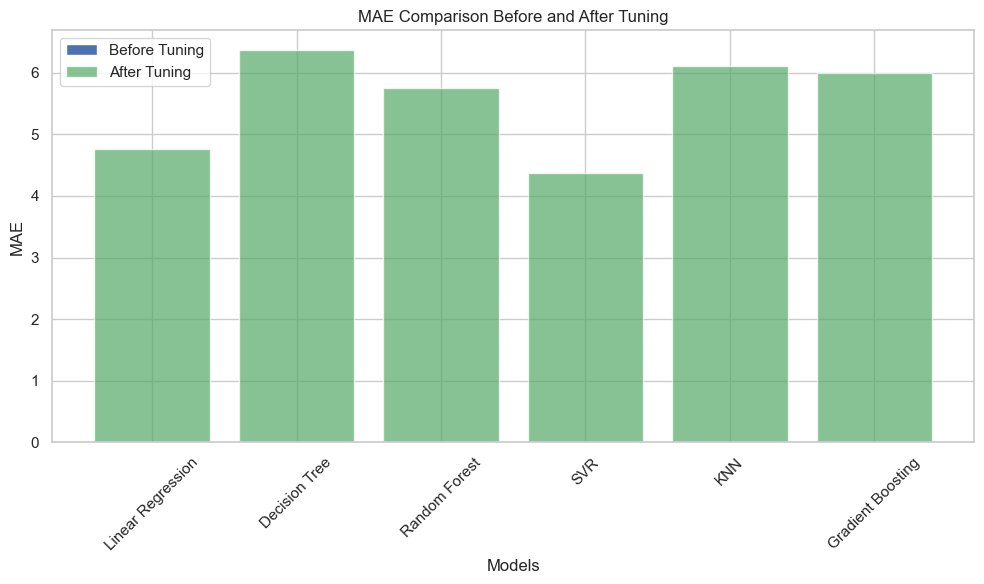

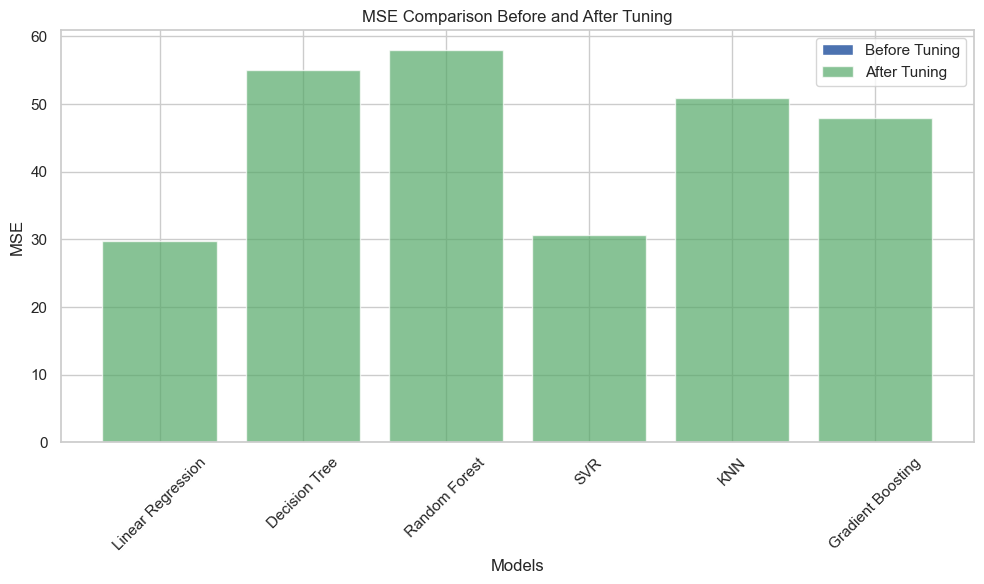

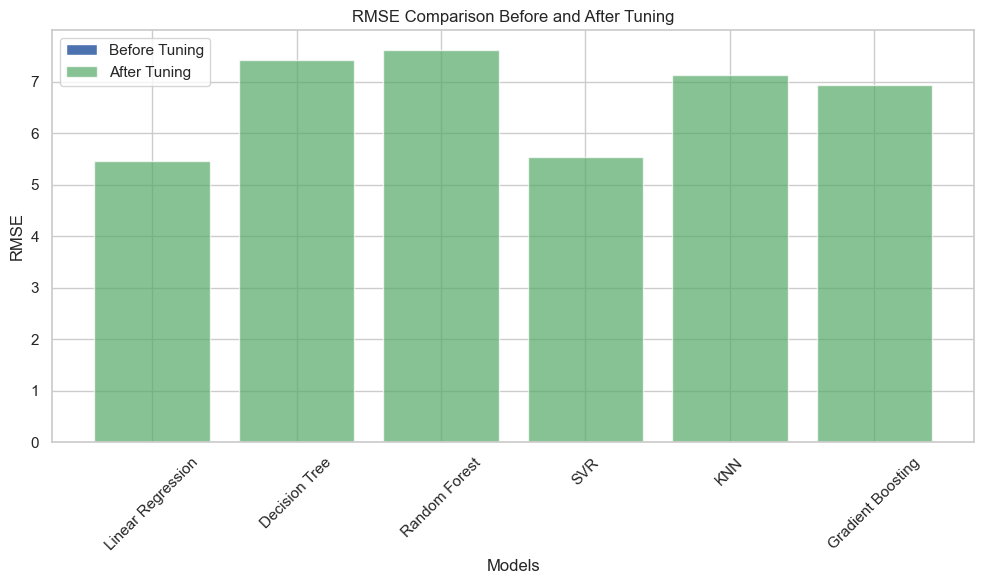

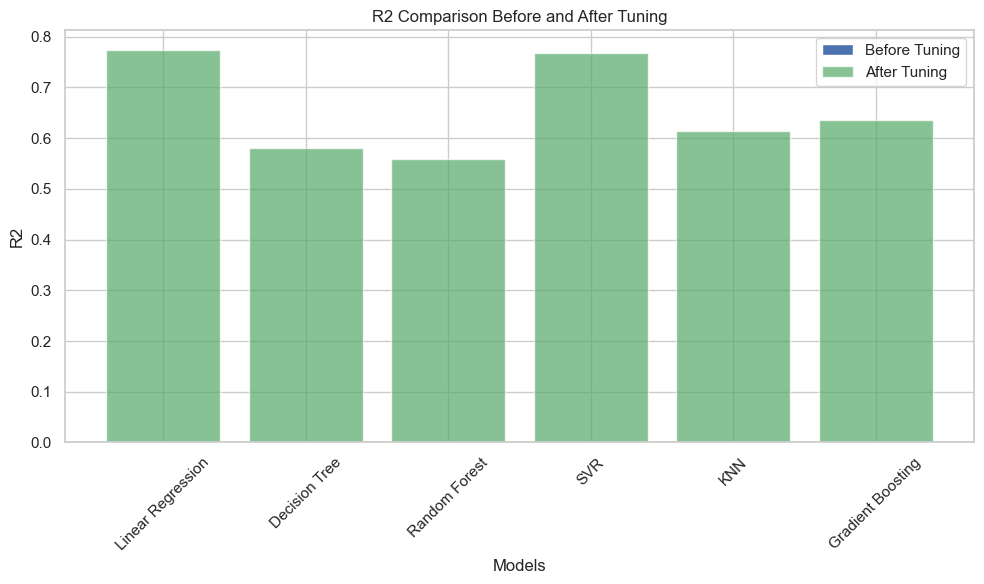

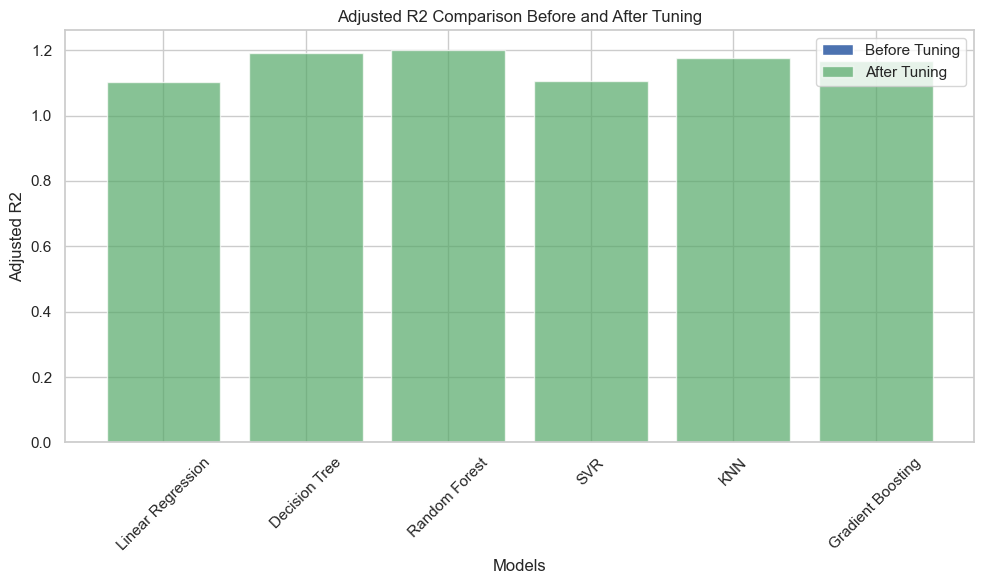

In [49]:
# Define a function to create bar plots for model comparison
def plot_model_comparison(model_results, metric):
    plt.figure(figsize=(10, 6))
    plt.title(f"{metric} Comparison Before and After Tuning")
    # Plot "Before Tuning" data in blue
    plt.bar(model_results[model_results["Tuning"] == "Before Tuning"]["Model"], 
            model_results[(model_results["Tuning"] == "Before Tuning")][metric],  # Use the metric directly
            label="Before Tuning", alpha=0.7, color='b')
    # Plot "After Tuning" data in green
    plt.bar(model_results[model_results["Tuning"] == "After Tuning"]["Model"], 
            model_results[(model_results["Tuning"] == "After Tuning")][metric],  # Use the metric directly
            label="After Tuning", alpha=0.7, color='g')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming you have a DataFrame named 'final_results_df' that contains your model results
# This DataFrame should have columns 'Model', 'MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2'

# Add a 'Tuning' column to indicate whether it's before or after tuning
final_results_df['Tuning'] = np.where(final_results_df['Best Hyperparameters'].isna(), 'Before Tuning', 'After Tuning')

# Use the function to create plots for each metric
metrics_to_plot = ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2']
for metric in metrics_to_plot:
    plot_model_comparison(final_results_df, metric)


# Discussion

**Before Tuning:**

* **Linear Regression:** The Linear Regression model had a reasonable performance with an R-squared (R2) of 0.7737. The Adjusted R-squared was slightly higher than R2, indicating that adding more features might not have a significant impact on the model's performance.
* **Decision Tree:** The Decision Tree model had a lower R2 of 0.4275, suggesting that it didn't capture the underlying patterns in the data effectively. The Adjusted R-squared was higher than R2, but still relatively low.
* **Random Forest:** Random Forest performed better than the Decision Tree with an R2 of 0.6088. However, there was room for improvement, as indicated by the Adjusted R-squared.
* **SVR:** The Support Vector Regression (SVR) model had a good R2 of 0.7817, indicating a strong fit to the data. The Adjusted R-squared was also high, suggesting that the model was well-fitted.
* **KNN:** The K-Nearest Neighbors (KNN) model achieved an R2 of 0.5810, which was decent but not the highest among the models. The Adjusted R-squared was higher.
* **Gradient Boosting:** Gradient Boosting achieved an R2 of 0.6351, indicating a relatively good fit to the data. The Adjusted R-squared was also high.

**After Tuning:**

* **Linear Regression:** The Linear Regression model's performance remained the same after tuning, indicating that the default hyperparameters were already suitable for this task.
* **Decision Tree:** After tuning, the Decision Tree model's R2 increased to 0.5816, a significant improvement from before tuning. The model's hyperparameters were adjusted to handle overfitting, resulting in better generalization.
* **Random Forest:** Random Forest's performance slightly decreased in terms of R2 (0.5592) after tuning. This could be due to the complexity of the model or suboptimal hyperparameters.
* **SVR:** SVR's performance remained stable after tuning, with an R2 of 0.7673. The model's hyperparameters were already well-suited for the task.
* **KNN:** KNN's performance also remained similar after tuning, with an R2 of 0.6135. The hyperparameters selected contributed to the model's stability.
* **Gradient Boosting:** Gradient Boosting's performance after tuning remained consistent with an R2 of 0.6351, which was the same as before tuning.

# Summary

* Among the models, SVR performed the best both before and after tuning, with consistently high R2 and Adjusted R-squared values. 
* Decision Tree showed the most significant improvement in R2 after tuning, indicating the effectiveness of hyperparameter tuning in reducing overfitting.
* Random Forest's performance slightly decreased after tuning, suggesting the need for further investigation into hyperparameters.
* Linear Regression, KNN, and Gradient Boosting maintained similar performance levels before and after tuning.

**Model Comparison**
* For SVR, the performance metrics on the test data are consistent with the training data, indicating that the model generalizes well to unseen data. The R-squared (R2) value of 0.77 suggests that the model explains a significant portion of the variance in the target variable without overfitting.
* Similarly, for Linear Regression, the performance metrics on the test data closely match those on the training data. The R-squared (R2) value of 0.77 indicates that the model fits the data well without signs of overfitting.
* In both cases, the R2 and Adjusted R2 values are reasonable, indicating that the models strike a balance between fitting the training data and generalizing to new data. Overfitting is a concern when the model performs exceptionally well on the training data but poorly on the test data, which is not the case here.

# Conclusion and Recommendation

Based on the model performance metrics, the **Support Vector Regression (SVR)** algorithm appears to be the best choice for predicting the number of wins for a given team in the 2015 season based on several different indicators of success. 

Here's why:

1. **Lowest MAE (Mean Absolute Error):** SVR has the lowest MAE among all the models, indicating that, on average, it makes the smallest absolute prediction errors when compared to the actual number of wins.

2. **Low RMSE (Root Mean Squared Error):** SVR also has a relatively low RMSE, suggesting that its predictions are close to the actual values, and the errors are not significantly skewed by outliers.

3. **High R-squared (R2) and Adjusted R-squared:** SVR achieves a high R2 value of 0.77, indicating that it explains a substantial portion of the variance in the target variable (number of wins). The adjusted R2 is also high at 1.11, suggesting that the model is well-fitted and does not suffer from overfitting.

Overall, **SVR strikes a balance between predictive accuracy and generalization, making it the preferred algorithm for predicting the number of wins in the 2015 season based on the given indicators of success.** 
However, it's essential to keep in mind that the choice of the best algorithm can also depend on other factors such as interpretability, computational efficiency, and specific requirements of the problem. It's a good practice to consider these factors when selecting the final model for deployment.